# Part #1: Import Libraries & Prepare the Data

In [1]:
# Import dependencies and setup pathlib to load csv files
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt
import scipy.stats as st

# Load csv dataset files from 'Resources' folder
load_mouse_data = Path("Resources/mouse_metadata.csv")
load_results_data = Path("Resources/Study_results.csv")

# Read mouse & results csv files and store datasets into separate Pandas DataFrames
mouse_metadata = pd.read_csv(load_mouse_data)
study_results = pd.read_csv(load_results_data)

# Inner merge both datasets into one;
# Only keep rows in the right DataFrame (study_results) where value of 'Mouse ID' exists on both DataFrames
merged_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Get the count of all unique 'Mouse ID' elements in the merged DataFrame
uncleaned_unique_mouseid = merged_df["Mouse ID"].nunique()

# Print the count of unique Mouse IDs from the merged DataFrame
print(f"There are {uncleaned_unique_mouseid} Unique Mouse IDs in the Uncleaned Dataset.")

# Display first 5 rows of the complete DataFrame (uncleaned)
merged_df.head()

There are 249 Unique Mouse IDs in the Uncleaned Dataset.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# From the merged DataFrame, store duplicate rows based on 'Mouse ID' & 'Timepoint' in a new DataFrame;
# All rows in the new DataFrame are marked as duplicates i.e. keep = False
# This is done to store all the duplicate rows
duplicate_df = merged_df[merged_df.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]

# Get the list of all unique mouse IDs from the DataFrame containing duplicate rows (duplicate_df)
duplicate_mouseid = duplicate_df["Mouse ID"].unique()

# Print all unique Mouse IDs from duplicate_df
print(f"Mouse ID(s) with Duplicate Timepoint Values: {duplicate_mouseid}")
print()

# For every Mouse ID in the list of Mouse IDs identified w/ duplicate rows...
# From the merged DataFrame, get all rows for the Mouse ID in the current iteration of the loop, then print those rows
# This is done in the event there is more than one Mouse ID identified with duplicate rows
for mouseid in duplicate_mouseid:
    show_dup_mouseid = merged_df[merged_df["Mouse ID"] == mouseid]
    print(f"Rows with Mouse ID {mouseid}:")
    display(show_dup_mouseid)
    print()

Mouse ID(s) with Duplicate Timepoint Values: ['g989']

Rows with Mouse ID g989:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# From the merged DataFrame, store the entire dataset in new DataFrame except rows for Mouse IDs identified w/ duplicate rows
# This becomes the new main DataFrame (Cleaned); will be used from now on
main_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_mouseid)]

# Get the count of all unique Mouse IDs from the cleaned main DataFrame
unique_mouseid = main_df["Mouse ID"].nunique()

# Print the count of unique Mouse IDs from the cleaned DataFrame
print(f"From the Cleaned Dataset, There are {unique_mouseid} Unique Mouse IDs now.")

# Display first 5 rows of the complete DataFrame (Cleaned)
main_df.head()

From the Cleaned Dataset, There are 248 Unique Mouse IDs now.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


# Part #2: Generate Summary Statistics

In [4]:
# Group main DataFrame by 'Drug Regimen' and store in a new DataFrame; will also be used to create bar charts in Part #3...
groupby_regimen_df = main_df.groupby("Drug Regimen")

# Using values from the 'Tumor Volume (mm3)' in the grouped DataFrame (by 'Drug Regimen')...
# Calculate Summary Statistics (Mean / Median / Variance / Std Deviation / Std Error of Mean) and store in new DataFrame
# '.agg()' Method is used to call multiple functions in one line of code
regimen_summary = groupby_regimen_df["Tumor Volume (mm3)"].agg(["mean", "median","var", "std", "sem"])

# Rename columns with appropriate headings in the Summary Statistics DataFrame
regimen_summary.columns = ["Mean Tumor Volume",
                           "Median Tumor Volume",
                           "Tumor Volume Variance",
                           "Tumor Volume Std. Dev.",
                           "Tumor Volume Std. Err."]

# Display Summary Statistics DataFrame
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Part #3: Create Bar Charts & Pie Charts

### Bar Chart #1: Using Pandas (DataFrame.plot() Method)

<Axes: title={'center': 'No. Observed Mouse Timepoints (per Drug Regimen)'}, xlabel='Drug Regimen', ylabel='No. Observed Mouse Timepoints'>

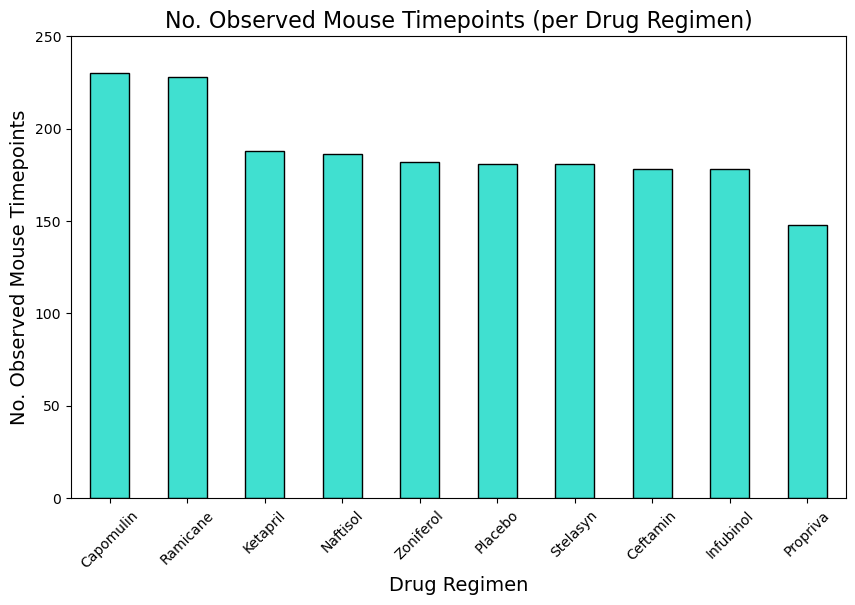

In [5]:
# From the grouped DataFrame, return a Series containing the counts of all unique Drug Regimen types in descending order
count_regimen = groupby_regimen_df["Drug Regimen"].value_counts().sort_values(ascending = False)

# Using the Pandas library (pd), plot the recent Series in a Bar Chart where...
# The color of the bars are Turquoise
# The outline of the bars are Black
# Plot figure is 10 by 6 i.e. (width = 10, height = 6)
pd_barplot = count_regimen.plot(kind = "bar",
                                color = "turquoise",
                                edgecolor = "black",
                                figsize = (10,6))

# In the Bar Chart plot, set a new title where Font Size is 16
pd_barplot.set_title("No. Observed Mouse Timepoints (per Drug Regimen)", fontsize = 16)

# In the Bar Chart plot, set a new label for the 'x' axis where Font Size is 14
pd_barplot.set_xlabel("Drug Regimen", fontsize = 14)

# In the Bar Chart plot, set a new label for the 'y' axis where Font Size is 14
pd_barplot.set_ylabel("No. Observed Mouse Timepoints", fontsize = 14)

# In the Bar Chart plot, rotate the 'x' ticks 45 degrees clockwise
pd_barplot.tick_params(axis = "x", labelrotation = 45)

# In the Bar Chart plot, update the 'y' axis range as: 0 to 250
pd_barplot.set_ylim(0,250)

# Display the final Bar Chart plot (Using Pandas Only)
pd_barplot

### Bar Chart #2: Using Matplotlib (Pyplot Methods)

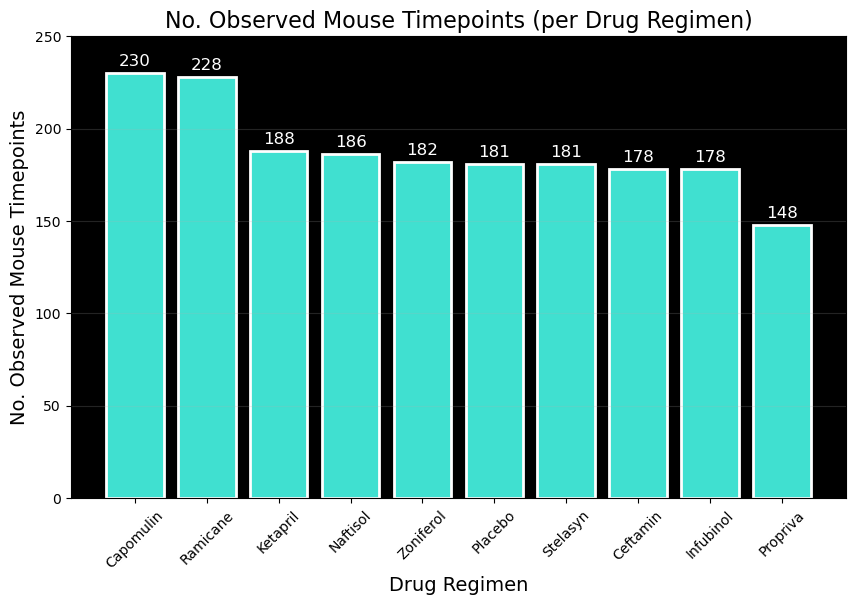

In [6]:
# Using the Series w/ counts of unique Drug Regimens, return a list of only the unique Drug Regimen types (index)
category_regimen = count_regimen.index

# Using the Series w/ counts of unique Drug Regimens, return a list of only the counts (values)
value_regimen = count_regimen.values

# First, adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
plt.figure(figsize = (10, 6))  

# Using the Matplotlib library (plt), plot a bar chart where...
# The 'x' axis is the 'Drug Regimen' Type; the 'y' axis is the 'Values' of each Drug Regimen Type;
# Colour of the bars are Turquoise; bar outlines are coloured white and set w/ a line thickness of 2
plt_barplot = plt.bar(category_regimen,
                      value_regimen,
                      color = "turquoise",
                      edgecolor = "white", linewidth = 2)

# Annotate each bar in the plot with the corresponding value it is visualising
# For every bar in the bar plot...
for bar in plt_barplot:
    
    # Get the height of the current bar i.e. the value of the drug regimen it is representing
    bar_height = bar.get_height()
    
    # Annotate the current bar where...
    # The annotation is the value of the bar height
    # Position the annotation above the bar in 'xy' coordinates;
        # 'x = bar.get_x()' will (horizontally) bring it to the bar, but far-left of it;
        # 'x = bar.get_x() + bar.get_width() / 2' will bring it to the center; would end up far-right if not divided by 2;
        # 'y = bar_height' would (vertically) place it above the current bar
    # Offset position of the annotation by 3 points vertically
    # Horziontally align annotation to the center; vertically align annotation to the bottom
    # Font size for annotation is adjusted to 12; font colour for annotation is set to White
    plt.annotate(str(bar_height),
                 xy = (bar.get_x() + bar.get_width() / 2, bar_height),
                 xytext = (0, 3), textcoords='offset points',
                 ha = "center", va ="bottom",
                 fontsize = 12, color="white")

# In the Bar Chart plot, set a new title where Font Size is 16
plt.title("No. Observed Mouse Timepoints (per Drug Regimen)", fontsize = 16)

# In the Bar Chart plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("Drug Regimen", fontsize = 14)

# In the Bar Chart plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("No. Observed Mouse Timepoints", fontsize = 14)

# In the Bar Chart plot, rotate the 'x' ticks 45 degrees clockwise and adjust Font size to 10
plt.xticks(rotation = 45, fontsize = 10)

# In the Bar Chart plot, adjust 'y' tick Font size to 10
plt.yticks(fontsize = 10)

# In the Bar Chart plot, update the 'y' axis range as: 0 to 250
plt.ylim(0,250)

# Set the background color of the bar plot (within the axes) to Black
plt.gca().set_facecolor("black")

# Add horizontal grid lines (faint) to the bar plot
plt.grid(axis = "y", alpha=0.2)

# Display the Bar Plot (Using Matplotlib)
plt.show()

### Pie Chart #1: Using Pandas (DataFrame.plot() Method)

<Axes: title={'center': 'Mice Distribution (By Sex)'}>

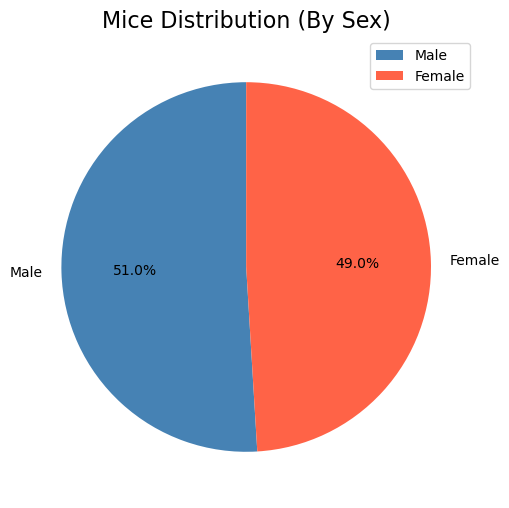

In [7]:
# Group main DataFrame by 'Sex' and store in a new DataFrame
sex_df = main_df.groupby("Sex")

# From the grouped DataFrame, return a Series containing the counts of all unique 'Sex' types in descending order
sex_count = sex_df["Sex"].value_counts().sort_values(ascending = False)

# Using the Pandas library (pd), plot the recent Series in a Pie Chart where...
# The numeric value label for each pie wedge ('Sex') is the value in '%' format rounded to 1 d.p.
# The color for each pie wedge is set
# The angle to cut the first pie wedge is 90 degrees
# A legend is included
# Plot figure is 10 by 6 i.e. (width = 10, height = 6)
pd_pieplot = sex_count.plot(kind = "pie",
                            autopct="%1.1f%%",
                            colors = ["steelblue", "tomato"],
                            startangle = 90,
                            legend = True,
                            figsize = (10,6))

# In the Pie Chart plot, set a new title where Font Size is 16
pd_pieplot.set_title("Mice Distribution (By Sex)", fontsize = 16)

# In the Pie Chart plot, remove the 'y' axis label
pd_pieplot.set_ylabel("")

# Display the final Pie Chart plot (Using Pandas Only)
pd_pieplot

### Pie Chart #2: Using Matplotlib (Pyplot Methods)

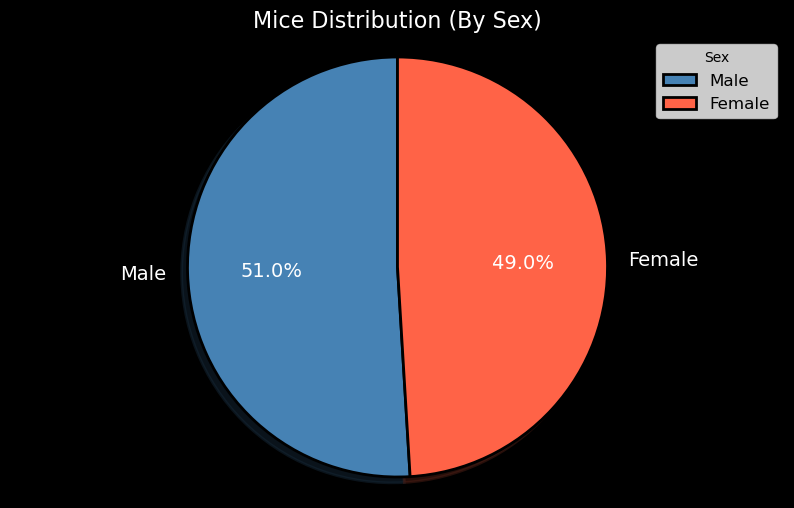

In [8]:
# Using the Series w/ counts of unique 'Sex' elements, return a list of only the unique 'Sex' types (index)
category_sex = sex_count.index

# Using the Series w/ counts of unique 'Sex' elements, return a list of only the counts (values)
value_sex = sex_count.values

# First, adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
fig_pie = plt.figure(figsize = (10, 6))

# Set background colour of the figure to "black"
fig_pie.patch.set_facecolor("black")

# Using the Matplotlib library (plt), plot a pie chart where...
# The values plotted are the values for each 'Sex' element
# The labels are the unique 'Sex' elements
# The color for each pie wedge is set
# The numeric value label for each pie wedge ('Sex') is the value in '%' format rounded to 1 d.p.
# The angle to cut the first pie wedge is 90 degrees
# Shadow effect is added to the plot figure
# Customise the label font size to 12; font color to white
# Customise the wedge outline color to "Black"; outline thickness adjusted to 2
plt_pieplot = plt.pie(value_sex,
                      labels = category_sex,
                      colors = ["steelblue", "tomato"],
                      autopct = "%1.1f%%",
                      startangle = 90,
                      shadow = True,
                      textprops = {"fontsize": 14, "color" : "white"},
                      wedgeprops = {"edgecolor": "black", "linewidth": 2})

# In the Pie Chart plot, set a new title where Font Size is 16 and Font Colour is "White"
plt.title("Mice Distribution (By Sex)", fontsize = 16, color = "white")

# In the Pie Chart Plot, add a 'Legend' (using list of unique 'Sex' elements);
    # Position it on the upper right of the figure plot
    # adjust font size in the Legend to 12
    # Include a Title in the Legend
plt.legend(category_sex, loc = "upper right", fontsize = 12, title = "Sex")

# Equalise the axes in the plot to display the Pie Chart as a perfect circle
plt.axis("equal")

# Display the Pie Plot (Using Matplotlib)
plt.show()

# Part #4: Calculate Quartiles, Find Outliers, and Create Box Plot

### Calculate Quartiles & Identify Outliers

In [9]:
# Group main DataFrame by 'Mouse ID' and return a list containing the row index w/ the max Timepoint per unique Mouse ID
max_timepoint_indices = main_df.groupby("Mouse ID")["Timepoint"].idxmax()

# From the Main DataFrame, only extract rows with index ID listed from 'highest_timepoint_indices' and store in new DataFrame
# In new DataFrame, reset the index sequencing
max_timepoint_df = main_df.loc[max_timepoint_indices].reset_index(drop=True)

# Show the DataFrame of the row w/ the max Timepoint value per unique Mouse ID
max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [10]:
# Create a new list containing the 'Most Promising' Drug Regimens; pre-determined
best_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to store dictionaries where each is one of the 'Most Promising' Drug Regimens w/ their tumor volume values
regimen_tumor_vol = []

# For every regimen listed in the list of 'Most Promising' Drug Regimens...
for i in range (len(best_regimen)):
    
    # Create a new temporary list (empty)
    temp_list = []
    
    # For every row in the DataFrame of rows w/ highest Timepoint per mouse ID...
    # If the 'Drug Regimen' element in the current row is equal to the current Regimen selected from' best_regimen'
    # Append the temporary list with the Tumor Volume value from that current row
    # 'index' variable only declared to use 'iterrows()' method
    for index, row in max_timepoint_df.iterrows():
        if row["Drug Regimen"] == best_regimen[i]:
            temp_list.append(row["Tumor Volume (mm3)"])

    
    # Create a new temporary dictionary where the key is the current Regimen and...
    # The value is the list of tumor volume values for the current Regimen 
    temp_dict = {best_regimen[i] : temp_list}
    
    # Create a new temporary DataFrame using the temporary dict
    # This is done to take advantage of the '.quantile()' method for DataFrames
    temp_df = pd.DataFrame(temp_dict)    
    
    # From the temporary DataFrame, get the 25% / 50% / 75% Quantiles of 'Tumor Volume' for the current Regimen
    regimen_quartiles = temp_df[best_regimen[i]].quantile([.25,.5,.75])
    
    # Store the 25th Percentile (Lower Quartile) for the current Regimen
    regimen_q1 = regimen_quartiles[0.25]
    
    # Store the 50th Percentile (Median) for the current Regimen
    regimen_q2 = regimen_quartiles[0.50]
    
    # Store the 50th Percentile (Upper Quartile) for the current Regimen
    regimen_q3 = regimen_quartiles[0.75]
    
    # Calculate the Interquartile Range (IQR) for the current Regimen; Q3 - Q1
    regimen_iqr = regimen_q3 - regimen_q1

    # Calulate the Lower Bound for the current Regimen; Q1 - (1.5 * IQR)
    regimen_lower_bound = regimen_q1 - (1.5 * regimen_iqr)
    
    # Calulate the Upper Bound for the current Regimen; Q3 + (1.5 * IQR)
    regimen_upper_bound = regimen_q3 + (1.5 * regimen_iqr)
    
    # Print Quartiles & IQR for the current Regimen
    print(f"-----------------------------------{best_regimen[i]}-----------------------------------\n")
    print(f"Lower Quartile (Q1) = {regimen_q1}")
    print(f"Upper Quartile (Q3) = {regimen_q3}")
    print(f"Interquartile Range (IQR) = {regimen_iqr}")
    print(f"Median (Q2) = {regimen_q2}")
    
    # Print to space out
    print()

    # Print the Lower Bound for the current Regimen
    print(f"Values below {regimen_lower_bound} (Lower Bound) could be outliers.")
    print(f"The following Tumor Volume values are below the Lower Bound for {best_regimen[i]}:\n")
    
    # For every tumor volume value for the current Regimen listed...
    # If the current value is less than the lower bound, then print the current tumor volume value
    for j in range(len(temp_list)):
        if temp_list[j] < regimen_lower_bound:
            print(f"{temp_list[j]}")
            print()
    
    # Print to space out
    print()
    
    # Print the Upper Bound for the current Regimen
    print(f"Values above {regimen_upper_bound} (Upper Bound) could be outliers.")
    print(f"The following Tumor Volume values are above the Upper Bound for {best_regimen[i]}:\n")
    
    # For every tumor volume value for the current Regimen listed...
    # If the current value is greater than the upper bound, then print the current tumor volume value
    for c in range(len(temp_list)):
        if temp_list[j] < regimen_lower_bound:
            print(f"{temp_list[c]}")
    print(f"-------------------------------------------------------------------------------\n")
    
    # Print to space out
    print()
    print()
    
    # Add dictionary of the current Regimen w/ corresponding tumor volume values to the main list
    regimen_tumor_vol.append(temp_dict)

-----------------------------------Capomulin-----------------------------------

Lower Quartile (Q1) = 32.37735684
Upper Quartile (Q3) = 40.1592203
Interquartile Range (IQR) = 7.781863460000004
Median (Q2) = 38.1251644

Values below 20.70456164999999 (Lower Bound) could be outliers.
The following Tumor Volume values are below the Lower Bound for Capomulin:


Values above 51.83201549 (Upper Bound) could be outliers.
The following Tumor Volume values are above the Upper Bound for Capomulin:

-------------------------------------------------------------------------------



-----------------------------------Ramicane-----------------------------------

Lower Quartile (Q1) = 31.56046955
Upper Quartile (Q3) = 40.65900627
Interquartile Range (IQR) = 9.098536719999998
Median (Q2) = 36.56165229

Values below 17.912664470000003 (Lower Bound) could be outliers.
The following Tumor Volume values are below the Lower Bound for Ramicane:


Values above 54.30681135 (Upper Bound) could be outliers.
Th

### Create Box Plot

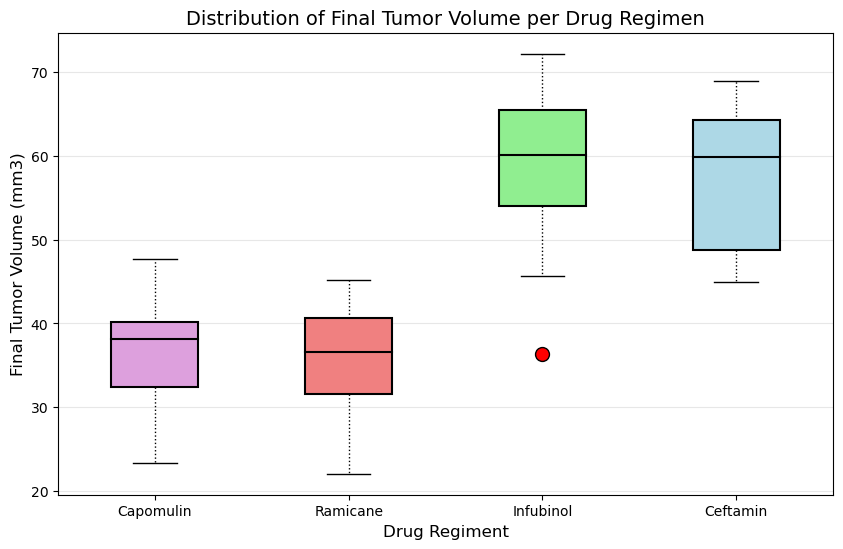

In [11]:
# From the main list of best regimen dictionaries, extract the key from each dictionary and store in a new list
rtv_labels = [list(d.keys())[0] for d in regimen_tumor_vol]

# From the main list of best regimen dictionaries extract the list of values from each dictionary and store in a new list
rtv_values = [list(d.values())[0] for d in regimen_tumor_vol]

# List of colours; Each box plot to be coloured differently 
boxplot_colors = ['plum', 'lightcoral', 'lightgreen', 'lightblue']

# Dictionary of specifications to customise the whiskers of all box plots where...
# Whisker lines will be coloured Black w/ thickness of 1; ; line style of the Whisker lines are dotted
whiskerprops = dict(color = "black", linewidth = 1, linestyle = "dotted")

# Dictionary of specifications to customise the outlier points ploted on the figure where...
# The colour fill is Red; size of the outlier points are 10
flierprops = dict(markerfacecolor = "red", markersize = 10)

# Dictionary of specifications to customise the median line of all box plots where...
# The median line is coloured Black; thickness of the line is 1.5
medianprops = dict(color = "black", linewidth = 1.5)

# Adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
plt.figure(figsize = (10, 6))

# Create the Boxplot using Matplotlib (plt) where...
# Values are the list of Tumor Volumes of each 'best' Regimen
# Labels are the list of 'best' Regimens
# All aforementioned list & dicts are passed through to apply aesthetic changes 
plt_boxplot = plt.boxplot(rtv_values, labels = rtv_labels,
                          whiskerprops = whiskerprops,
                          flierprops = flierprops,
                          medianprops = medianprops,
                          patch_artist = True)


# For every box in the box plots, and every colour in the defined list of colours...
# Set the colour fill of current box with the current colour selected from boxplot_colors
# Also set the outline of the current box to 'Black', and its thickness to 1.5
for box, color in zip(plt_boxplot["boxes"], boxplot_colors):
    box.set(facecolor = color, edgecolor = "black", linewidth = 1.5)

# In the box plot figure, set a new title where Font Size is 14    
plt.title("Distribution of Final Tumor Volume per Drug Regimen", fontsize = 14)
    
# In the box plot figure, set a new label for the 'x' axis where Font Size is 12
plt.xlabel("Drug Regiment", fontsize = 12)

# In the box plot figure, set a new label for the 'y' axis where Font Size is 12
plt.ylabel("Final Tumor Volume (mm3)", fontsize = 12)

# In the box plot figure, adjust 'x' tick Font size to 10
plt.xticks(fontsize = 10)

# In the box plot figure, adjust 'y' tick Font size to 10
plt.yticks(fontsize = 10)

# Add horizontal grid lines (faint) to the box plot
plt.grid(axis = "y", alpha=0.3)

# Display the Box Plot (Using Matplotlib)
plt.show()

# Part #5: Create Line Plot & Scatter Plot


### Line Plot (Any Mouse Treated w/ 'Capomulin' Drug Regimen)

In [12]:
# Define the target Drug Regimen (e.g. Capomulin); pre-determined
target_regimen = "Capomulin"

# From the main DataFrame, get all rows where 'Drug Regimen' element is the target Regimen (e.g. Capomulin)
target_df = main_df[main_df["Drug Regimen"] == target_regimen]

# Display the new DataFrame of all rows where 'Drug Regimen' element is the target Regimen (e.g. Capomulin)
target_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


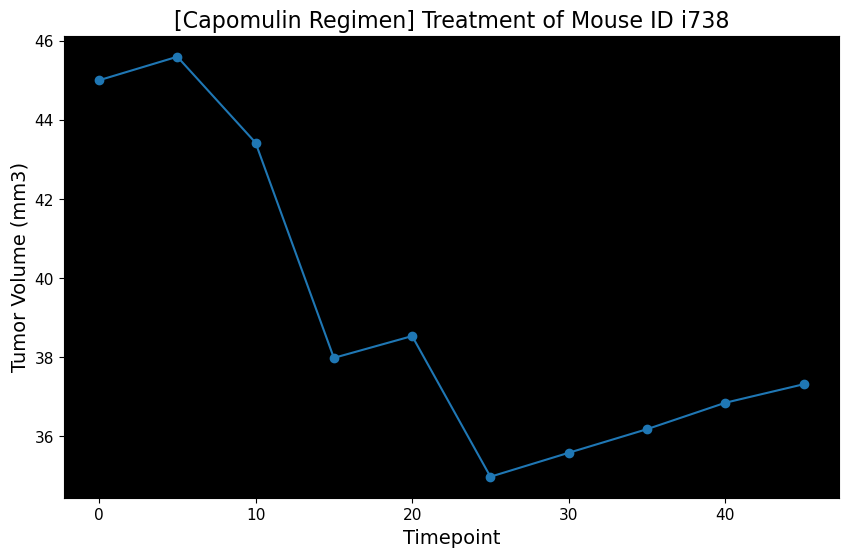

In [13]:
# Get a list of unique IDs within the DataFrame of the target Drug Regimen (e.g. Capomulin)
# Will also be used when creating the scatter plot
target_unique_mouseids = target_df["Mouse ID"].unique()

# Select a random ID from the list unique IDs within the DataFrame of the target Drug Regimen (e.g. Capomulin)
# Uses Random library to randomly select an element
target_selected_mouseid = random.choice(target_unique_mouseids)

# From the target Regimen DataFrame, get all rows where Mouse ID is the randomly selected Mouse ID 
mouseid_df = target_df[(target_df["Mouse ID"] == target_selected_mouseid)]

# Adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
plt.figure(figsize = (10, 6))

# Create the Line Plot using Matplotlib (plt) where...
# 'x' axis is the Timepoint for the selected Mouse ID; 'y' axis is the Tumor Volume for the selected Mouse ID
# The dotted points in the plot are circle-styled
plt_lineplot = plt.plot(mouseid_df["Timepoint"],
                        mouseid_df["Tumor Volume (mm3)"],
                        marker = 'o')


# In the Line plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("Timepoint", fontsize = 14)

# In the Line plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)

# In the Line plot, adjust 'x' tick Font size to 11
plt.xticks(fontsize = 11)

# In the Line plot, adjust 'y' tick Font size to 11
plt.yticks(fontsize = 11)

# In the Line plot, set a new title where Font Size is 16
plt.title(f"[{target_regimen} Regimen] Treatment of Mouse ID {target_selected_mouseid}", fontsize  = 16)

# Set the background color of the Scatter plot (within the axes) to Black
plt.gca().set_facecolor("black")


# Display the Line Plot (Using Matplotlib)
plt.show()

### Scatter Plot (Mouse Weight vs. Avg. Tumor Volume  for 'Capomulin' Drug Regimen)

In [14]:
# Create an empty DataFrame with 'Weight' & 'Average Tumor Volume (mm3)' Columns
average_vol_df = pd.DataFrame({"Weight (g)": [], "Average Tumor Volume (mm3)" : []})

# For every mouse ID in the list of unique Mouse IDs for the target Drug Regimen (e.g. Capomulin)...
for i in range (len(target_unique_mouseids)):
    
    # Get all rows from the target DataFrame where Mouse ID is the current Mouse ID in the list
    temp_mouseid_df = target_df[target_df["Mouse ID"] == target_unique_mouseids[i]]
    
    # Get the first element of the list of unique elements from 'Weight (g)' column from the temporary DataFrame
    # This done to get the weight of the current Mouse ID; will NOT be different across the relevant rows
    temp_weight = temp_mouseid_df["Weight (g)"].unique()[0]
    
    # Calculate the mean (Average) of the 'Tumor Volume (mm3)' from the temporary DataFrame
    temp_avg = temp_mouseid_df["Tumor Volume (mm3)"].mean()
    
    # Store both the weight & average tumor volume of current Mouse ID in a new DataFrame
    # Visualised as a new row for the 'Average Tumor Volume' DataFrame (average_vol_df)
    new_row_df = pd.DataFrame([{"Weight (g)": temp_weight, "Average Tumor Volume (mm3)" : temp_avg}])
    
    # # Concatenate the 'Average Tumor Volume' DataFrame and 'New Row' DataFrame vertically (i.e. along row) 
    average_vol_df = pd.concat([average_vol_df, new_row_df], ignore_index=True, axis = 0)

# Display the full 'Average Tumor Volume' DataFrame
average_vol_df

,Weight (g),Average Tumor Volume (mm3)
0,22.0,41.963636
1,21.0,43.216925
2,17.0,36.509212
3,17.0,34.559143
4,21.0,40.083699
5,15.0,36.182040
6,21.0,44.434474
7,23.0,42.803733
8,25.0,45.798970
9,17.0,39.887495


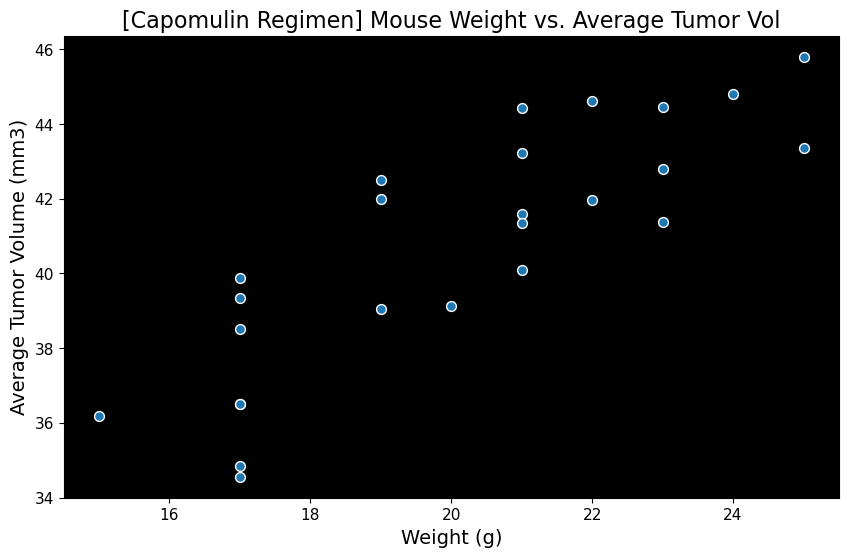

In [15]:
# From the 'Average Tumor Volume' DataFrame, store all values from the 'Weight (g)' column in a new list
weight_values = average_vol_df.iloc[:,0]

# From the 'Average Tumor Volume' DataFrame, store all values from the 'Average Tumor Volume (mm3)' column in a new list
avg_values = average_vol_df.iloc[:,1]

# Adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
plt.figure(figsize = (10, 6))

# Create the Scatter Plot using Matplotlib (plt) where...
# 'x' axis is the Weight (g)
# 'y' axis is the Average Tumor Volume (mm3)
# The plotted point(s) outline colour is White
# The size of plotted (s) is 50
plt_scatterplot = plt.scatter(weight_values,
                              avg_values,
                              edgecolor = "white",
                              s = 50)

# In the Scatter plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("Weight (g)", fontsize = 14)

# In the Scatter plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)

# In the Scatter plot, adjust 'x' tick Font size to 11
plt.xticks(fontsize = 11)

# In the Scatter plot, adjust 'y' tick Font size to 11
plt.yticks(fontsize = 11)

# In the Scatter plot, set a new title where Font Size is 16
plt.title(f"[{target_regimen} Regimen] Mouse Weight vs. Average Tumor Vol", fontsize  = 16)

# Set the background color of the Scatter plot (within the axes) to Black
plt.gca().set_facecolor("black")


# Display the Scatter Plot (Using Matplotlib)
plt.show()

# Part #5: Calculate Correlation & Regression

Pearson Correlation Coefficient of Mouse Weight vs. Average Tumor Volume is: 0.84 


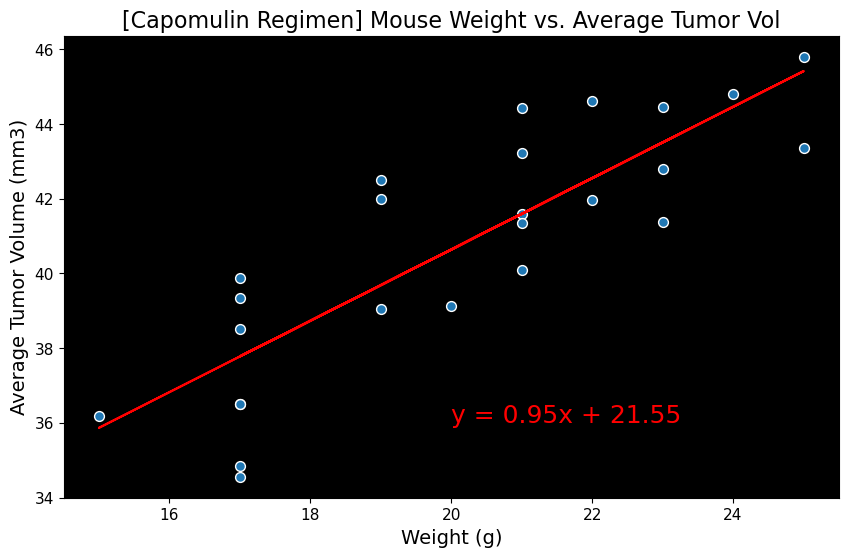

In [16]:
# Using the Scipy library (st), perform linear regression for the target Drug Regimen (e.g. Capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_values, avg_values)

# Calculate the Regression line (y = mx + b) for the target Drug Regimen (e.g. Capomulin)
# m = slope
# x = weight_values
# b = intercept
regress_values = weight_values * slope + intercept

# Using the Scipy library (st), calculate the Pearson Correlation Coefficient between Weight and Avg. Tumor Volume
p_correlation = st.pearsonr(weight_values, avg_values)[0]

#Store a string of the regression line formula for mouse weight vs. average observed tumor volume
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
# This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
plt.figure(figsize = (10, 6))

# Plot the regression line in the figure
plt.plot(weight_values, regress_values, color = "red")

# Add the regression line equation in the point
plt.annotate(line_eq, xy = (20,36), fontsize = 18, color  = "red")

# Create the Scatter Plot using Matplotlib (plt) where...
# 'x' axis is the Weight (g)
# 'y' axis is the Average Tumor Volume (mm3)
# The plotted point(s) outline colour is White
# The size of plotted (s) is 50
plt_scatterplot = plt.scatter(weight_values,
                              avg_values,
                              edgecolor = "white",
                              s = 50)

# In the Scatter plot, set a new label for the 'x' axis where Font Size is 14
plt.xlabel("Weight (g)", fontsize = 14)

# In the Scatter plot, set a new label for the 'y' axis where Font Size is 14
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)

# In the Scatter plot, adjust 'x' tick Font size to 11
plt.xticks(fontsize = 11)

# In the Scatter plot, adjust 'y' tick Font size to 11
plt.yticks(fontsize = 11)

# In the Scatter plot, set a new title where Font Size is 16
plt.title(f"[{target_regimen} Regimen] Mouse Weight vs. Average Tumor Vol", fontsize  = 16)

# Set the background color of the Scatter plot (within the axes) to Black
plt.gca().set_facecolor("black")



# Print Pearson Correlation Coefficient where the value is rounded to 2 d.p.
print(f"Pearson Correlation Coefficient of Mouse Weight vs. Average Tumor Volume is: {round(p_correlation, 2)} ")


# Display the Scatter Plot (Using Matplotlib)
plt.show()